In [1]:
## Import Data Analysis, Wrangling, and Visualization Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Imports preprocessing libraries

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
## Import Model

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

In [4]:
# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [5]:
# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [6]:
# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

In [7]:
# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Load Dataset
df = pd.read_csv("car data.csv")
     

In [11]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  301
Number of columns are:  9


In [16]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [21]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 2


In [24]:
# Missing Values/Null Values Count
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

- The car dataset consists of Cars Name, Price details, No. of Owner etc. of different cars.
- There are 301 rows and 9 columns provided in the data.
- 2 duplicate rows present in the dataset.
- Null values not exist in the dataset.

In [28]:
# Dataset Columns
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [30]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.00,301.00,301.00,301.00,301,301,301,301.00
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.63,4.66,7.63,36947.21,NaN,NaN,NaN,0.04
std,NaN,2.89,5.08,8.64,38886.88,NaN,NaN,NaN,0.25
min,NaN,2003.00,0.10,0.32,500.00,NaN,NaN,NaN,0.00
25%,NaN,2012.00,0.90,1.20,15000.00,NaN,NaN,NaN,0.00
50%,NaN,2014.00,3.60,6.40,32000.00,NaN,NaN,NaN,0.00
75%,NaN,2016.00,6.00,9.90,48767.00,NaN,NaN,NaN,0.00


In [32]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Car_Name is 98
No. of unique values in Year is 16
No. of unique values in Selling_Price is 156
No. of unique values in Present_Price is 148
No. of unique values in Driven_kms is 206
No. of unique values in Fuel_Type is 3
No. of unique values in Selling_type is 2
No. of unique values in Transmission is 2
No. of unique values in Owner is 3


In [34]:
# Adding a 'Current Year' column with a constant value of 2023 to the DataFrame
df['Current Year'] = 2023

# Calculating the age of the vehicles by subtracting the 'Year' column from the 'Current Year'
df['no_year'] = df['Current Year'] - df['Year']

In [36]:
# Removing the 'Current Year' column as it's no longer needed
df.drop(['Current Year'], axis=1, inplace=True)

In [38]:
# New updated DataFrame
df.head()
     

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [40]:
# Defining dependent variable
dependent_variable = ['Selling_Price']

### Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

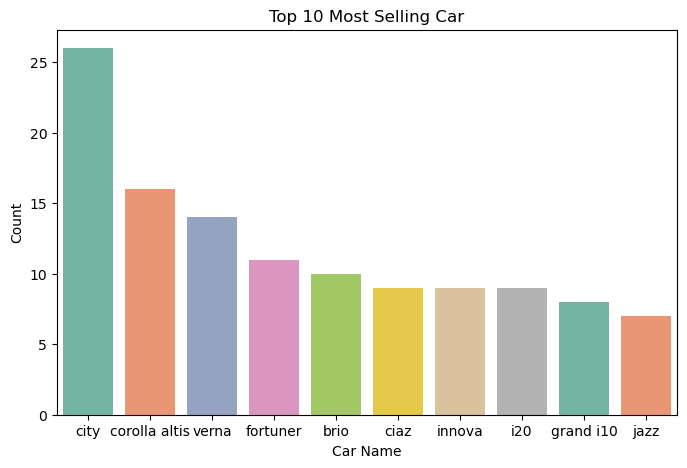

In [43]:
# Chart - 1 Count plot visualization code for top 10 most selling car
# Count the occurrences of each unique car name in the 'Car_Name' column and take the top 10 most selling car
top10 = df['Car_Name'].value_counts()[:10]

# Create a count plot to visualize the top 10 car
plt.figure(figsize=(8, 5))
sns.countplot(x='Car_Name', data=df, order=top10.index, palette='Set2')

# Set labels and title for the plot
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Top 10 Most Selling Car')

# Display the plot
plt.show()
     

From the above chart, we got to know that 'city' is the top most selling car, followed by corolla altis, verna, fortuner and brio.

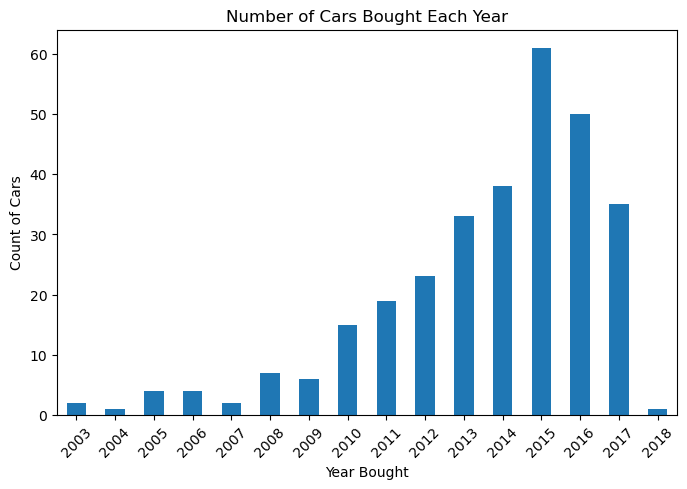

In [46]:
# Chart - 2 Bar plot visualization code for Number of Cars Bought Each Year
# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Group the data by the 'Year' column and count the number of occurrences for each year
yearly_counts = df.groupby('Year').count()['Car_Name']

# Create a bar plot to visualize the count of cars bought in each year
yearly_counts.plot(kind='bar')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Set labels and title for the plot
plt.xlabel('Year Bought')
plt.ylabel('Count of Cars')
plt.title('Number of Cars Bought Each Year')

# Display the plot
plt.show()
     


From the above chart, we got to know that 2015 has the highest count of car purchases (popular year for buying cars), followed by 2016 and 2014.

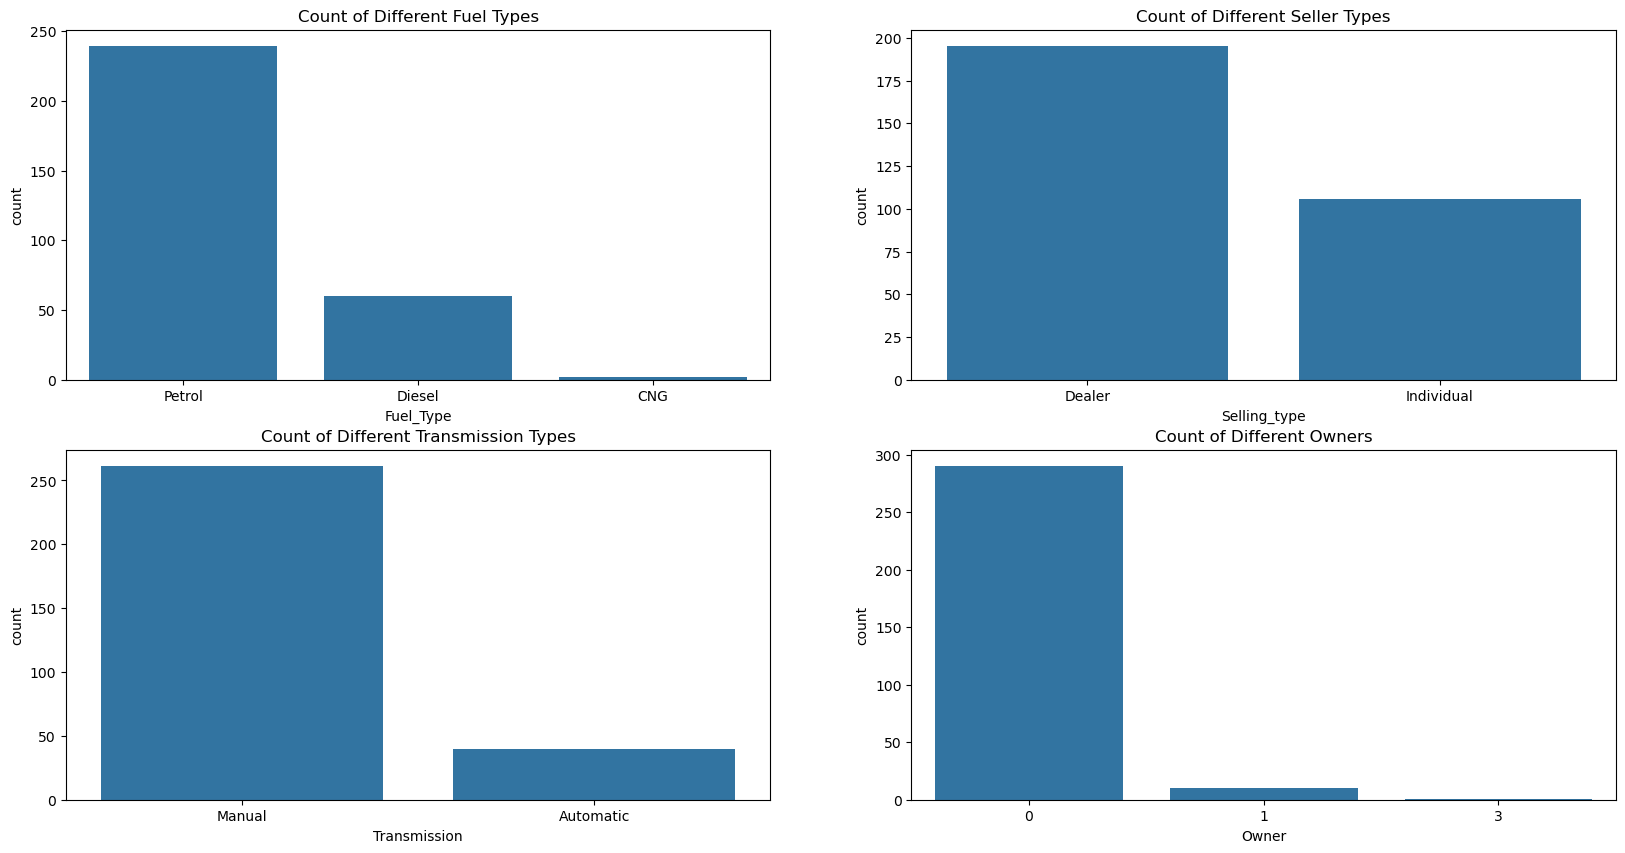

In [49]:
# Chart - 3 Count plot visualization code for Categorical Variable
# Create a 2x2 subplot
plt.figure(figsize=(20,10))

# Subplot 1: Count of different Fuel Types
plt.subplot(2,2,1)
sns.countplot(data=df, x = 'Fuel_Type')
plt.title("Count of Different Fuel Types")

# Subplot 2: Count of different Seller Types
plt.subplot(2,2,2)
sns.countplot(data=df, x = 'Selling_type')
plt.title("Count of Different Seller Types")

# Subplot 3: Count of different Transmission Types
plt.subplot(2,2,3)
sns.countplot(data=df, x = 'Transmission')
plt.title("Count of Different Transmission Types")

# Subplot 4: Count of different Owners
plt.subplot(2,2,4)
sns.countplot(data=df, x = 'Owner')
plt.title("Count of Different Owners")

# Display the plot
plt.show()
     

- The number of cars having their 'Fuel_Type' type as Petrol is greater when compared to the other types namely: Diesel and CNG.
- We can observe that most of the cars are sold through Dealers when compared to the Individual sellers.
- We clearly see that Manual cars are much more in number when compared to Automatic cars.
- Most of the cars are sold by the First Owners and negligible number of cars are sold by the Third or Fourth Owners.

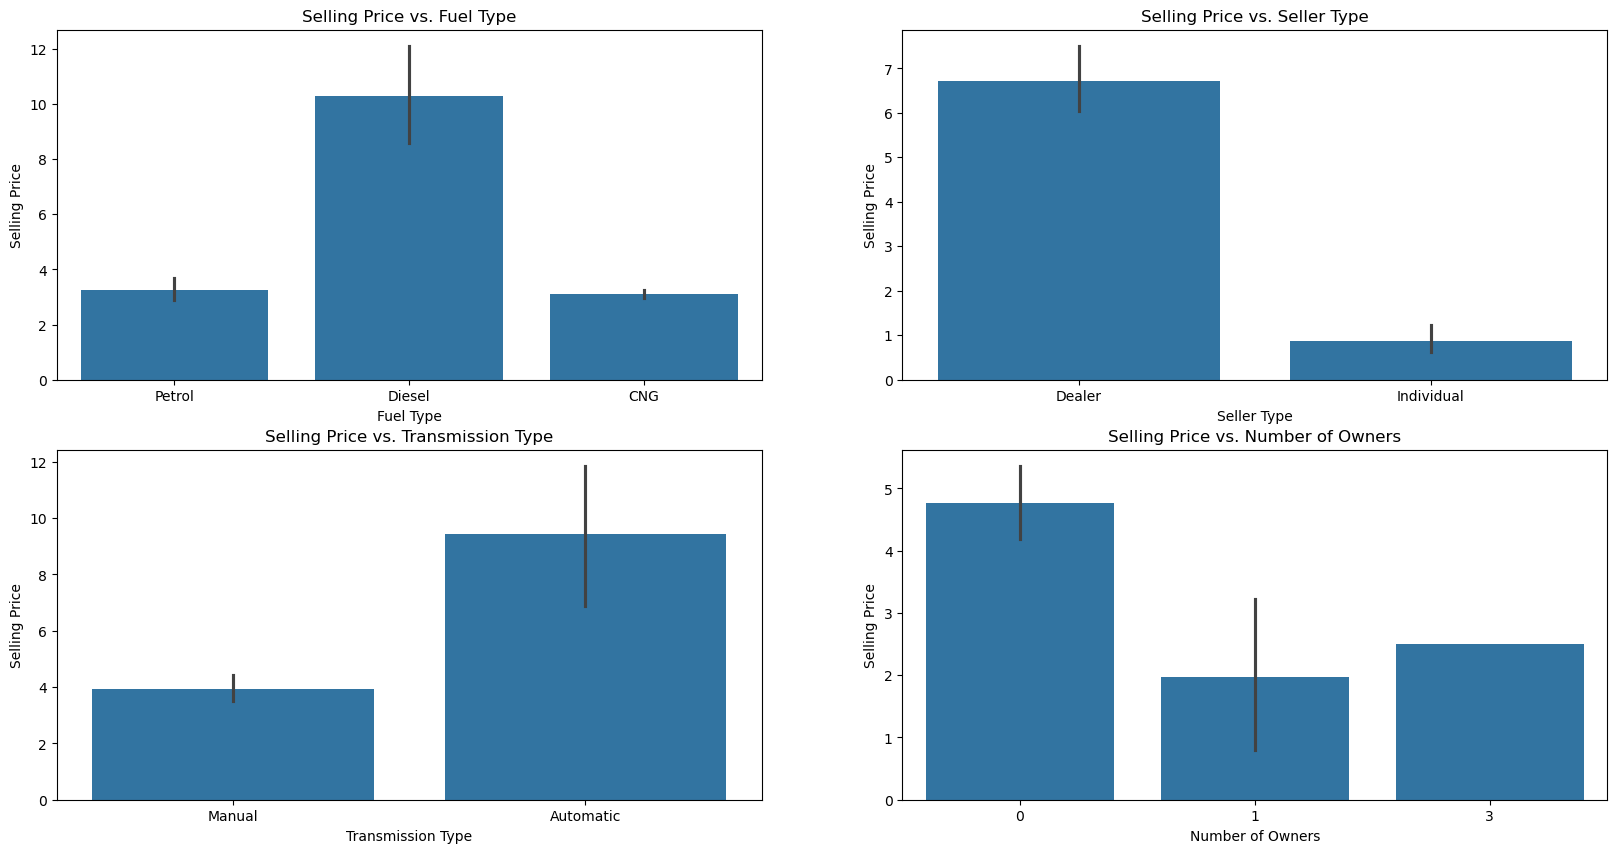

In [52]:
# Chart - 4 Barplot visualization code for categorical variable vs target variable
# Create a 2x2 subplot
plt.figure(figsize=(20,10))

# Subplot 1: Barplot for Selling_Price vs. Fuel_Type
plt.subplot(2,2,1)
sns.barplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Fuel Type')

# Subplot 2: Barplot for Selling_Price vs. Seller_Type
plt.subplot(2,2,2)
sns.barplot(data=df, x='Selling_type', y='Selling_Price')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Seller Type')

# Subplot 3: Barplot for Selling_Price vs. Transmission
plt.subplot(2,2,3)
sns.barplot(data=df, x='Transmission', y='Selling_Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Transmission Type')

# Subplot 4: Barplot for Selling_Price vs. Owner
plt.subplot(2,2,4)
sns.barplot(data=df, x='Owner', y='Selling_Price')
plt.xlabel('Number of Owners')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Number of Owners')

# Display the plot
plt.show()
     

- The cars with 'Fuel_Type' Diesel has a higher 'Selling_Price' compared to the rest and at the same time cars running on Petrol and CNG are costs less and almost same.
- The cars sold by the 'Seller_Type' Dealers have a higher range whereas Individual sellers cost low.
- The cars with Automatic 'Transmission' costs more than the cars with Manual Transmission.
- First Owner cars holds a higher value in terms of 'Selling_Price' whereas we can also observe that the 'Selling_Price' reduces with an increase in the number of 'Owner'.

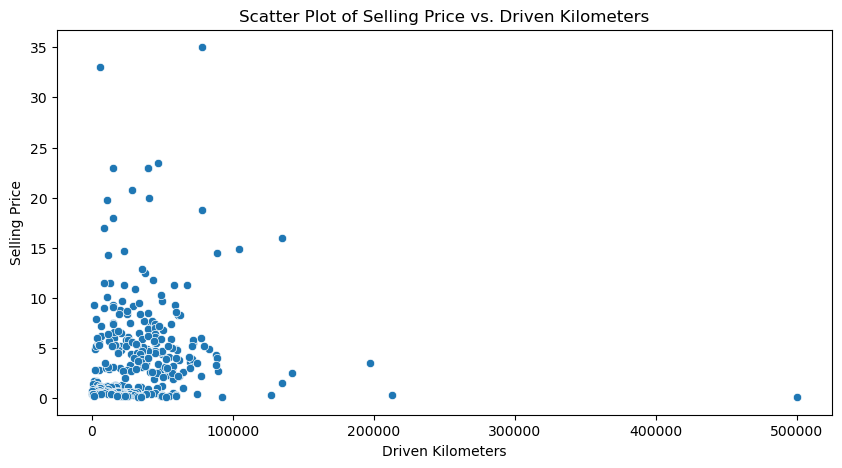

In [54]:
# Chart - 5 Scatter plot visualization code for Driven Kilometers vs Selling Price
# Set the figure size for the plot
plt.figure(figsize=(10,5))

# Create a scatter plot to visualize the relationship between Driven_kms and Selling_Price
sns.scatterplot(data=df, x='Driven_kms', y='Selling_Price')

# Set labels for the x and y axes
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')

# Add a title to the plot
plt.title('Scatter Plot of Selling Price vs. Driven Kilometers')

# Display the plot
plt.show()
     

From the above Scatterplot, it can clearly seen that as the number of Driven Kilometers increases, the Selling Price of the car tends to decrease.

In [57]:
# Select only the numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Check if any columns were dropped
non_numeric_cols = df.columns.difference(numeric_df.columns)
print("Non-numeric columns found:", non_numeric_cols)


Non-numeric columns found: Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')


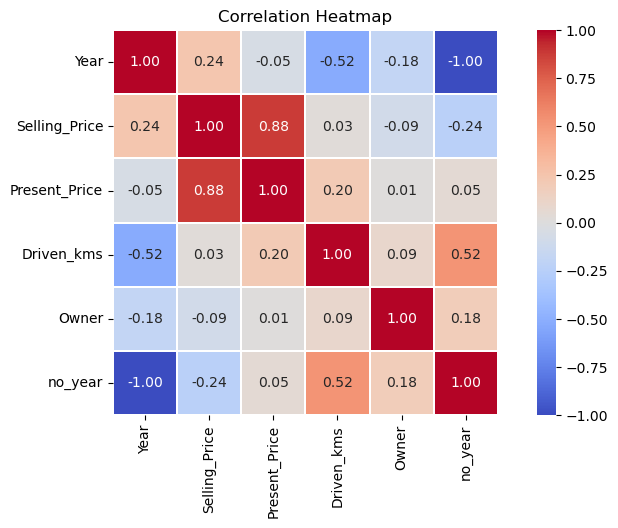

In [59]:
# Correlation Heatmap visualization code
# Set the size of the plot
plt.figure(figsize=(10,5))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(numeric_df.corr(), annot=True, linewidths=0.1, fmt='.2f',
            square=True, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()


From the above correlation heatmap we get to know that, Present price and selling price are positively highly correlated, as 'Present_Price' is likely one of the significant factors that influence the 'Selling_Price' of a car. And 'no_year' and 'Year' are negatively highly correlated.

In [62]:
# Handling Outliers & Outlier treatments
# Removing outliers by Using IQR method:
q1, q3, median = df.Selling_Price.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['Selling_Price'] = np.where(df['Selling_Price'] > upper_limit, median,np.where(df['Selling_Price'] < lower_limit,median,df['Selling_Price']))

# Removing outliers by Capping:
for col in ['Present_Price','Driven_kms','Owner','no_year']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

In [65]:
# Before Categorical Encoding, Remove the 'Car Name' as it's no longer needed
df.drop(['Car_Name'], axis=1, inplace=True)

In [67]:
# Using one-hot encoding to convert categorical variables into numerical format
df = pd.get_dummies(df)
     

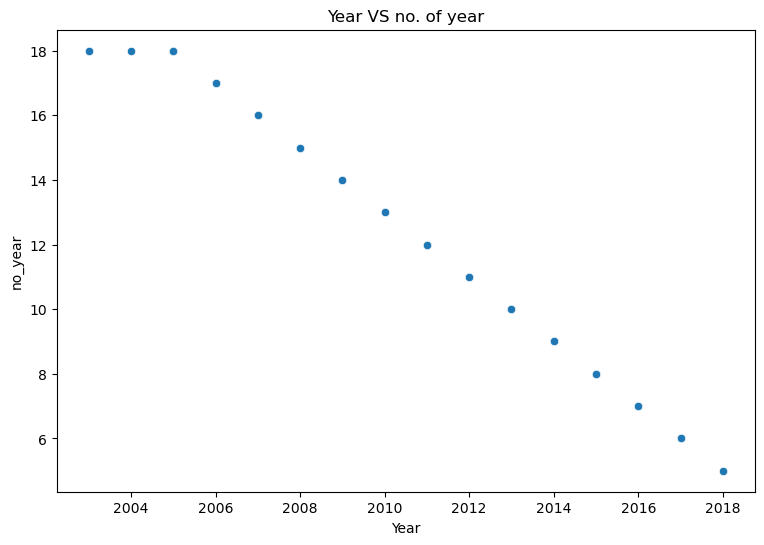

In [69]:

# Manipulate Features to minimize feature correlation and create new features

# We see that the Year and no_year are negatively highly correlated

# Plotting Scatter plot to visualize the relationship between
# Year and no_year
plt.figure(figsize=(9,6))
sns.scatterplot(x='Year',y='no_year',data=df)
plt.xlabel('Year')
plt.ylabel('no_year')
plt.title('Year VS no. of year')
plt.show()

In [71]:
# Correlation
df[['Year','no_year']].corr()

,Year,no_year
Year,1.000000,-0.998376
no_year,-0.998376,1.000000


In [73]:
# Removing 'Year' column as we've already calculated the age in the 'no_year' column
df.drop(['Year'], axis=1, inplace=True)

In [75]:
# Select your features wisely to avoid overfitting
features = [i for i in df.columns if i not in ['Selling_Price']]
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

In [77]:
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [79]:
continuous_variables = ['Present_Price', 'Driven_kms', 'Owner', 'no_year']

In [81]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [83]:
continuous_feature_df

,Present_Price,Driven_kms,Owner,no_year
0,5.59,27000.0,0.0,9.0
1,9.54,43000.0,0.0,10.0
2,9.85,6900.0,0.0,6.0
3,4.15,5200.0,0.0,12.0
4,6.87,42450.0,0.0,9.0
...,...,...,...,...
296,11.60,33988.0,0.0,7.0
297,5.90,60000.0,0.0,8.0
298,11.00,87934.0,0.0,14.0
299,12.50,9000.0,0.0,6.0


In [85]:
calc_vif(df[[i for i in continuous_feature_df]])

,variables,VIF
0,Present_Price,2.153995
1,Driven_kms,4.818128
2,Owner,1.061741
3,no_year,4.530533


In [87]:
# This is the final data for modeling
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000.0,0.0,9.0,False,False,True,True,False,False,True
1,4.75,9.54,43000.0,0.0,10.0,False,True,False,True,False,False,True
2,7.25,9.85,6900.0,0.0,6.0,False,False,True,True,False,False,True
3,2.85,4.15,5200.0,0.0,12.0,False,False,True,True,False,False,True
4,4.60,6.87,42450.0,0.0,9.0,False,True,False,True,False,False,True


From above methods i have found that there is negitively high correlation between Year and no_year. So, i take only 'no_year' variable and drop the 'Year' column, as we've already calculated the age in the 'no_year' column.

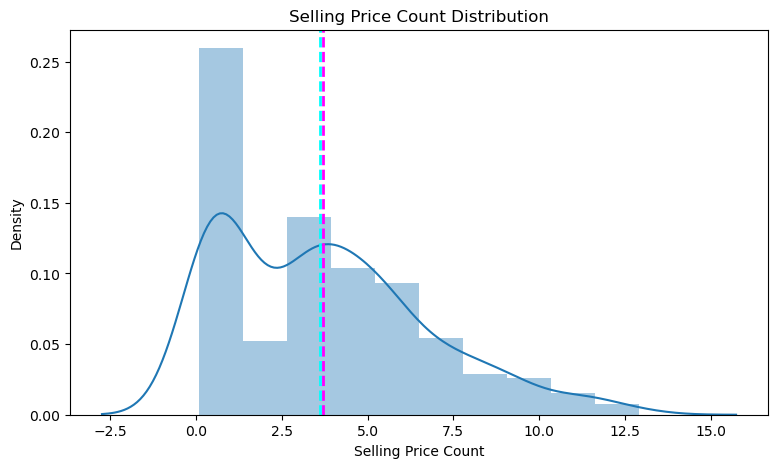

In [90]:
## Data Transformation

# Transform the data
# Visualizing the distribution of the dependent variable - Selling Price
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [92]:
# Skew of the dependent variable
df[dependent_variable].skew()
     

Selling_Price    0.757016
dtype: float64

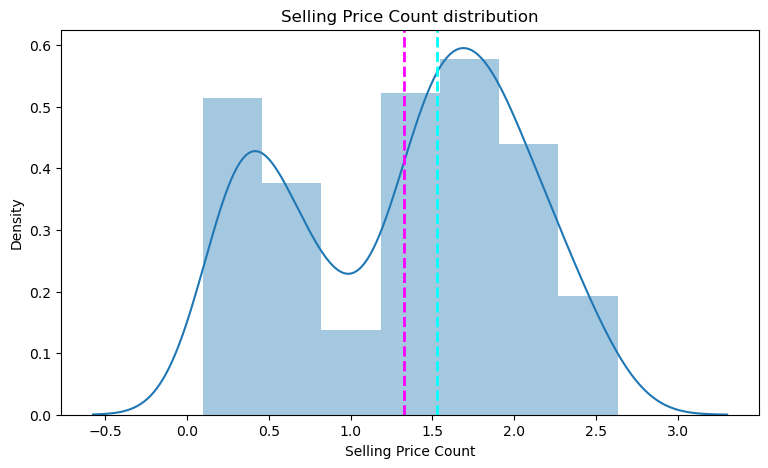

In [94]:
# Visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(9,5))
sns.distplot(np.log1p(df[dependent_variable]))
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count distribution')
plt.axvline(np.log1p(df['Selling_Price']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(df['Selling_Price']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [96]:

# Skew of the dependent variable after log transformation
np.log1p(df[dependent_variable]).skew()

Selling_Price   -0.222356
dtype: float64

In [98]:
# Defining dependent and independent variables
X = df.drop('Selling_Price',axis=1)
y = np.log1p(df[dependent_variable])

In [100]:
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

In [102]:
## Data Scaling

features = [i for i in df.columns if i not in ['Selling_Price']]


In [104]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

In [106]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
     

In [108]:
# Checking the train distribution of dependent variable
y_train.value_counts()

Selling_Price
1.526056         11
0.470004          6
0.371564          6
0.182322          5
1.609438          5
                 ..
1.294727          1
1.266948          1
1.208960          1
1.131402          1
2.602690          1
Name: count, Length: 116, dtype: int64

In [110]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 5 important features, and returns a list of the model scores'''

  # Apply inverse log transformation to y_test and y_pred as we have used log transformation
  y_t = np.exp(y_test)
  y_p = np.exp(y_pred)
  y_train2 = np.exp(y_train)
  y_train_pred = np.exp(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_t,y_p)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Selling Price', fontsize=12)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Feature importances
  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(7,4))
  plt.title('Feature Importances (top 5) for '+str(model), fontsize = 12)
  plt.xlabel('Relative Importance')
  feat.nlargest(5).plot(kind='barh')


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score
     

In [112]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])
     

In [114]:
# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

In [116]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
score['Linear regression'] = linear_score

MSE : 4.169924716556083
RMSE : 2.042039352352467
MAE : 1.28914859192798
Train R2 : 0.6421421951879261
Test R2 : 0.492441798334486
Adjusted R2 :  0.4217691373430853


In [118]:
# Updated Evaluation Metric Score chart
score

,Linear regression
MSE,4.169925
RMSE,2.042039
MAE,1.289149
Train R2,0.642142
Test R2,0.492442
Adjusted R2,0.421769


In [120]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [122]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)
     

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8058936696873664


In [124]:
# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [126]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)

In [128]:
# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

MSE : 4.169924716556083
RMSE : 2.042039352352467
MAE : 1.28914859192798
Train R2 : 0.6421421951879261
Test R2 : 0.492441798334486
Adjusted R2 :  0.4217691373430853


In [130]:
# Updated Evaluation Metric Score chart
score['Linear regression tuned'] = linear_score2
score

,Linear regression,Linear regression tuned
MSE,4.169925,4.169925
RMSE,2.042039,2.042039
MAE,1.289149,1.289149
Train R2,0.642142,0.642142
Test R2,0.492442,0.492442
Adjusted R2,0.421769,0.421769


For untuned model, I found R2 score of 0.642142 & 0.492442 for train and test set. And 4.169925 and 1.289149 as MSE and MAE respectively.

For tuned model, I found R2 score of 0.642142 & 0.492442 for train and test set. And 4.169925 and 1.289149 as MSE and MAE respectively.

For Both tuned and untuned model, no improvement is seen.

In [133]:
# Import the Lasso Regression class
lasso = Lasso()

# Fit the lasso regression model to the training data
lasso.fit(X_train, y_train)

# Predict on the model
y_pred_lasso1 = lasso.predict(X_test)

In [135]:
# Visualizing evaluation Metric Score chart
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

MSE : 9.807266785467892
RMSE : 3.1316555981569705
MAE : 2.513357873886036
Train R2 : -0.10059179585999933
Test R2 : -0.19372867167662267
Adjusted R2 :  -0.35994405634045634


In [137]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression
MSE,4.169925,4.169925,9.807267
RMSE,2.042039,2.042039,3.131656
MAE,1.289149,1.289149,2.513358
Train R2,0.642142,0.642142,-0.100592
Test R2,0.492442,0.492442,-0.193729
Adjusted R2,0.421769,0.421769,-0.359944


It is seen that using Lasso regression analysis the performance of the model has drop down. So i will try to tuned the model.

In [140]:
# Define the model
lasso = Lasso()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [142]:
# Getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
     

The optimum alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.09201807273836608


In [144]:
# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Fit the lasso regression model to your training data
lasso.fit(X_train, y_train)

# Predict the model
y_pred_lassocv = lasso.predict(X_test)

In [146]:
#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

MSE : 4.143092228273675
RMSE : 2.0354587267428625
MAE : 1.2972252346842905
Train R2 : 0.6362928099908937
Test R2 : 0.49570781641024586
Adjusted R2 :  0.425489917429394


In [148]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01
MSE,4.169925,4.169925,9.807267,4.143092
RMSE,2.042039,2.042039,3.131656,2.035459
MAE,1.289149,1.289149,2.513358,1.297225
Train R2,0.642142,0.642142,-0.100592,0.636293
Test R2,0.492442,0.492442,-0.193729,0.495708
Adjusted R2,0.421769,0.421769,-0.359944,0.425490


After tuning i have seen that there is increase in test set performance, which is upto 49%

In [151]:
# Ridge regressor class
ridge = Ridge()

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)
     

In [153]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

MSE : 4.160398593300272
RMSE : 2.0397055163185374
MAE : 1.2889405804291565
Train R2 : 0.6419159865096078
Test R2 : 0.49360130655518997
Adjusted R2 :  0.42309009607553283


In [155]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge
MSE,4.169925,4.169925,9.807267,4.143092,4.160399
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706
MAE,1.289149,1.289149,2.513358,1.297225,1.288941
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090



I have used Ridge regression technique to check the performance of the model and i have found that there is no majorly difference in between linear regression and Ridge. Both models are quite similar.

In [158]:
# Import Ridge regressor Class
ridge = Ridge()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [160]:
# Getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)
     

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.0923947181715041


In [162]:
# Initiate ridge with best alpha
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)
     

# Evaluation matrices for Ridge regression
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result

MSE : 4.089084352387017
RMSE : 2.0221484496413753
MAE : 1.291699681922242
Train R2 : 0.6392569529931535
Test R2 : 0.502281589853198
Adjusted R2 :  0.4329790264150357


In [164]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979


i have found that the tuned Ridge regression model give the better accuracy compare to the untuned model for the test set.

In [167]:
# Import Decision Tree Regressor class
dt = DecisionTreeRegressor(random_state=1)

# Fit the Decision Tree model to your training data
dt.fit(X_train,y_train)

# Predict on the model
y_pred_dt1 = dt.predict(X_test)

# Visualizing evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

MSE : 0.7083516483516488
RMSE : 0.8416362922020704
MAE : 0.5716483516483518
Train R2 : 1.0
Test R2 : 0.9137802926377292
Adjusted R2 :  0.9017750169290586


In [169]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.708352
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.841636
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.571648
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.913780
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.901775


From the decision tree algorithm i got train R2 score is 1 and test R2 score is 90% which shows the overfitting condition on train dataset.

So, i have decided to tune the data using GridSearchCV.

In [172]:
# Regressor
dt_model = DecisionTreeRegressor(random_state=1)

# Hyperparameter Grid
grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

# Grid Search
dt_gridsearch = GridSearchCV(dt_model,grid,cv=6,scoring= 'neg_root_mean_squared_error')

dt_gridsearch.fit(X_train, y_train)
dt_best_params = dt_gridsearch.best_params_
     

dt_best_params

{'max_depth': 8, 'min_samples_leaf': 24, 'min_samples_split': 35}

In [173]:
# Build model with best params
dt_model = DecisionTreeRegressor(
    max_depth=dt_best_params['max_depth'],
    min_samples_leaf=dt_best_params['min_samples_leaf'],
    min_samples_split=dt_best_params['min_samples_split'],
    random_state=1
)

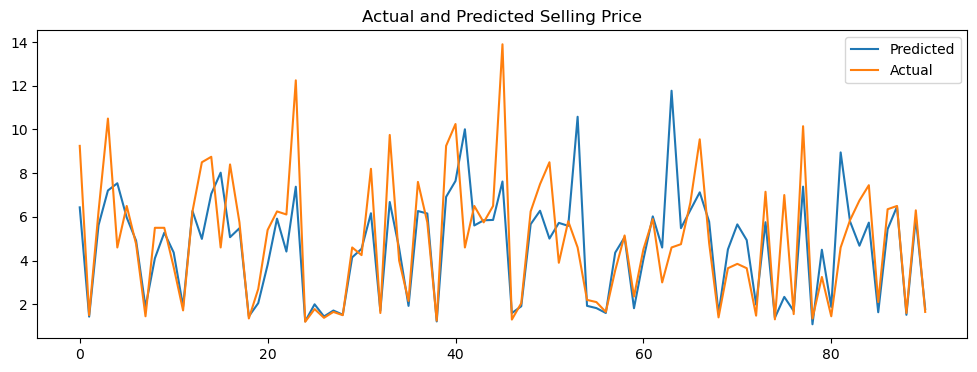

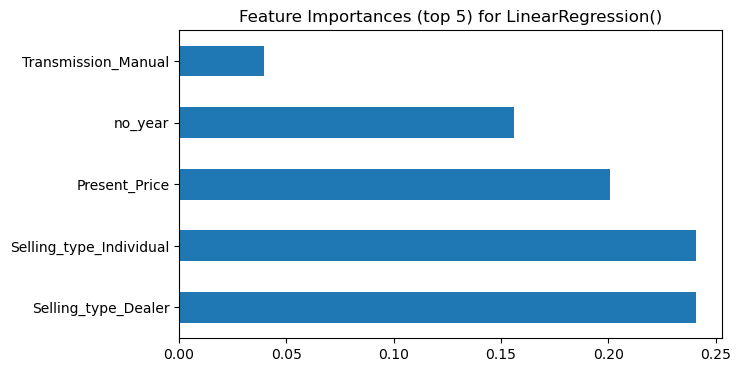

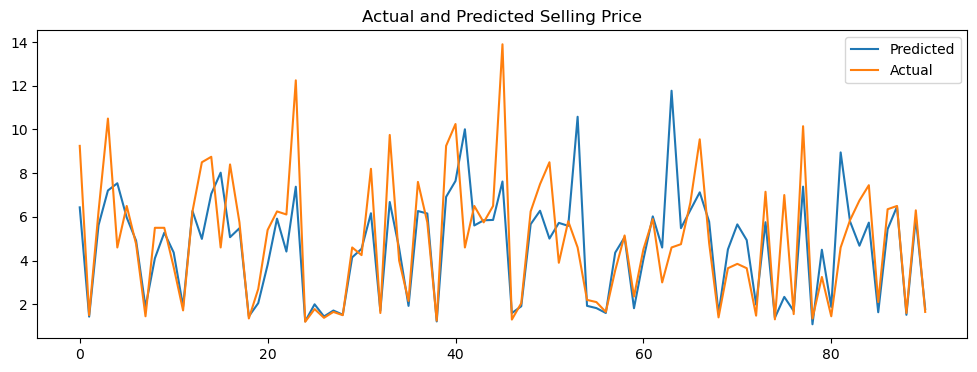

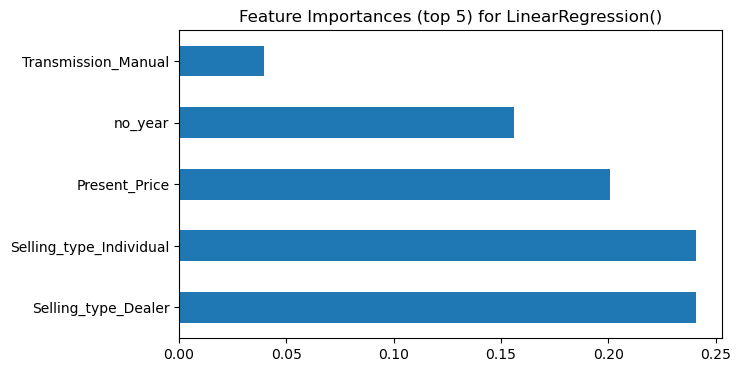

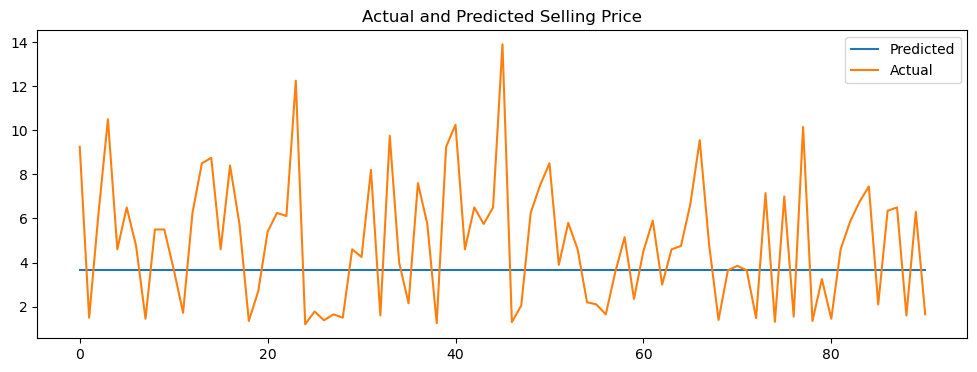

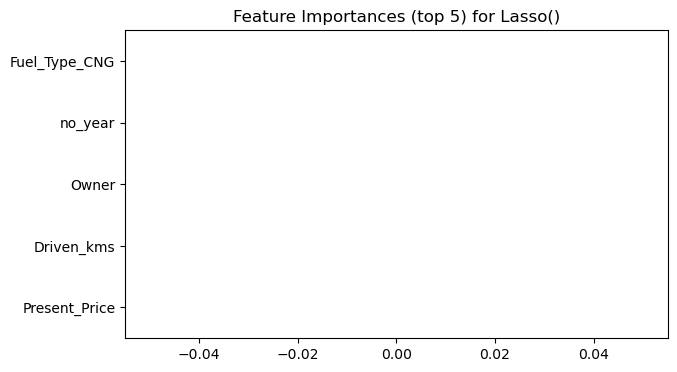

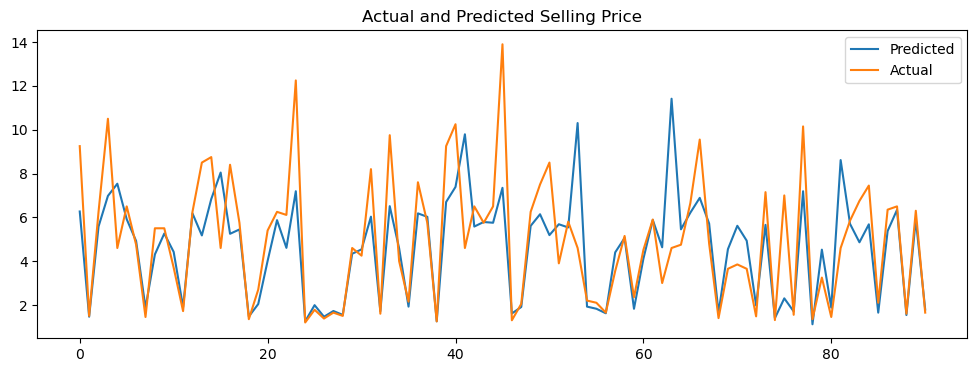

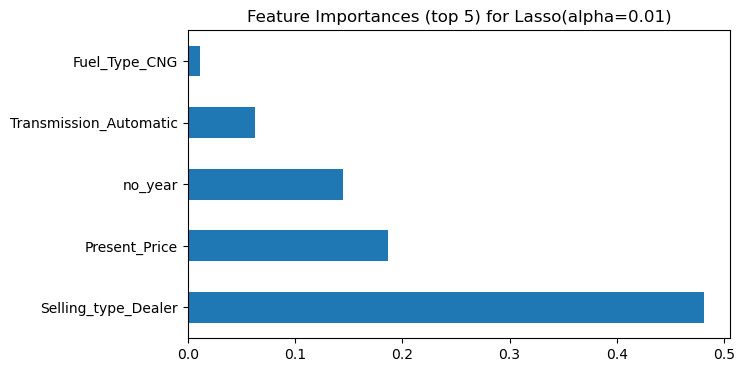

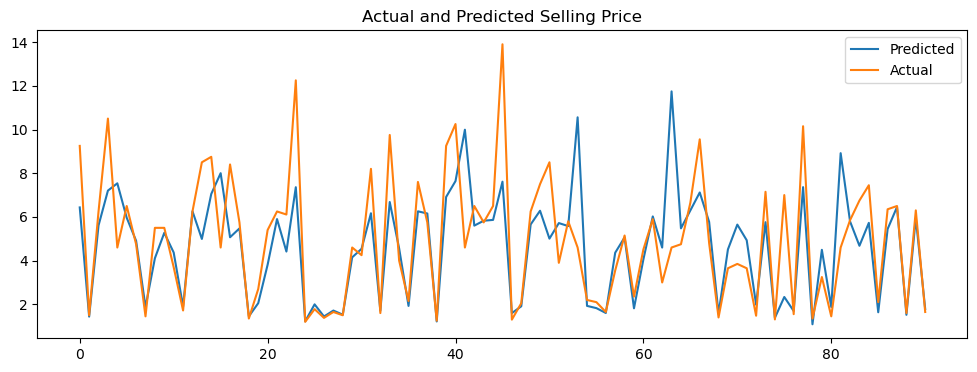

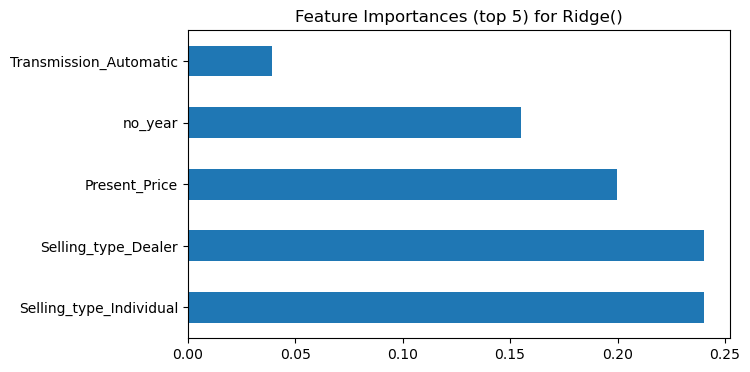

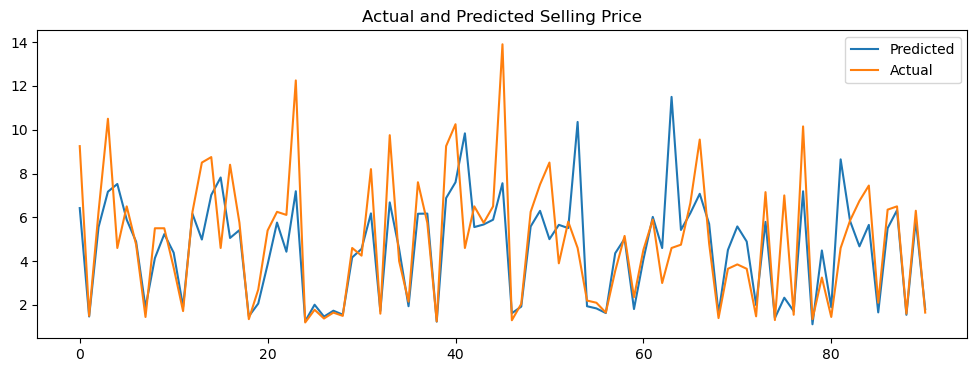

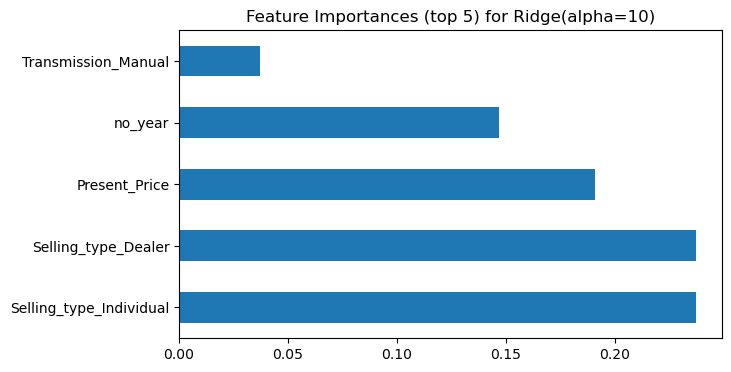

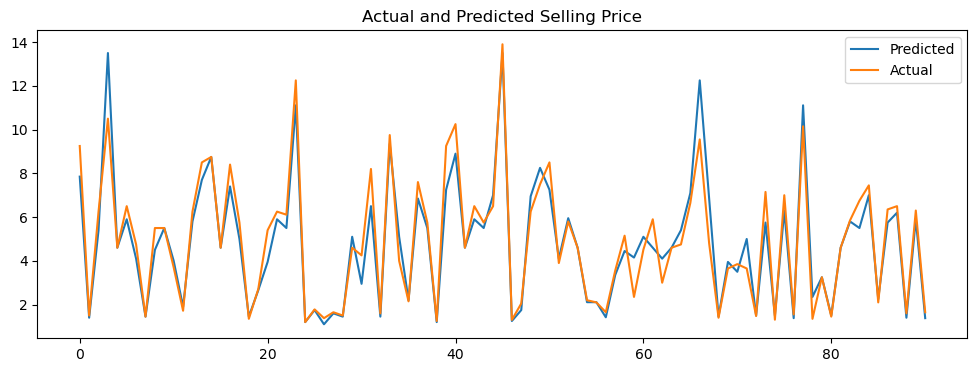

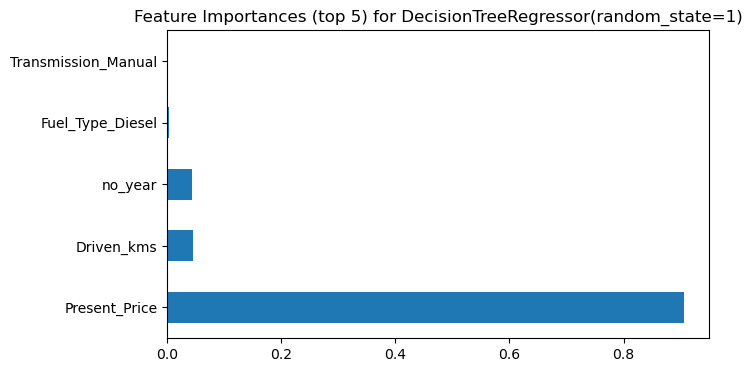

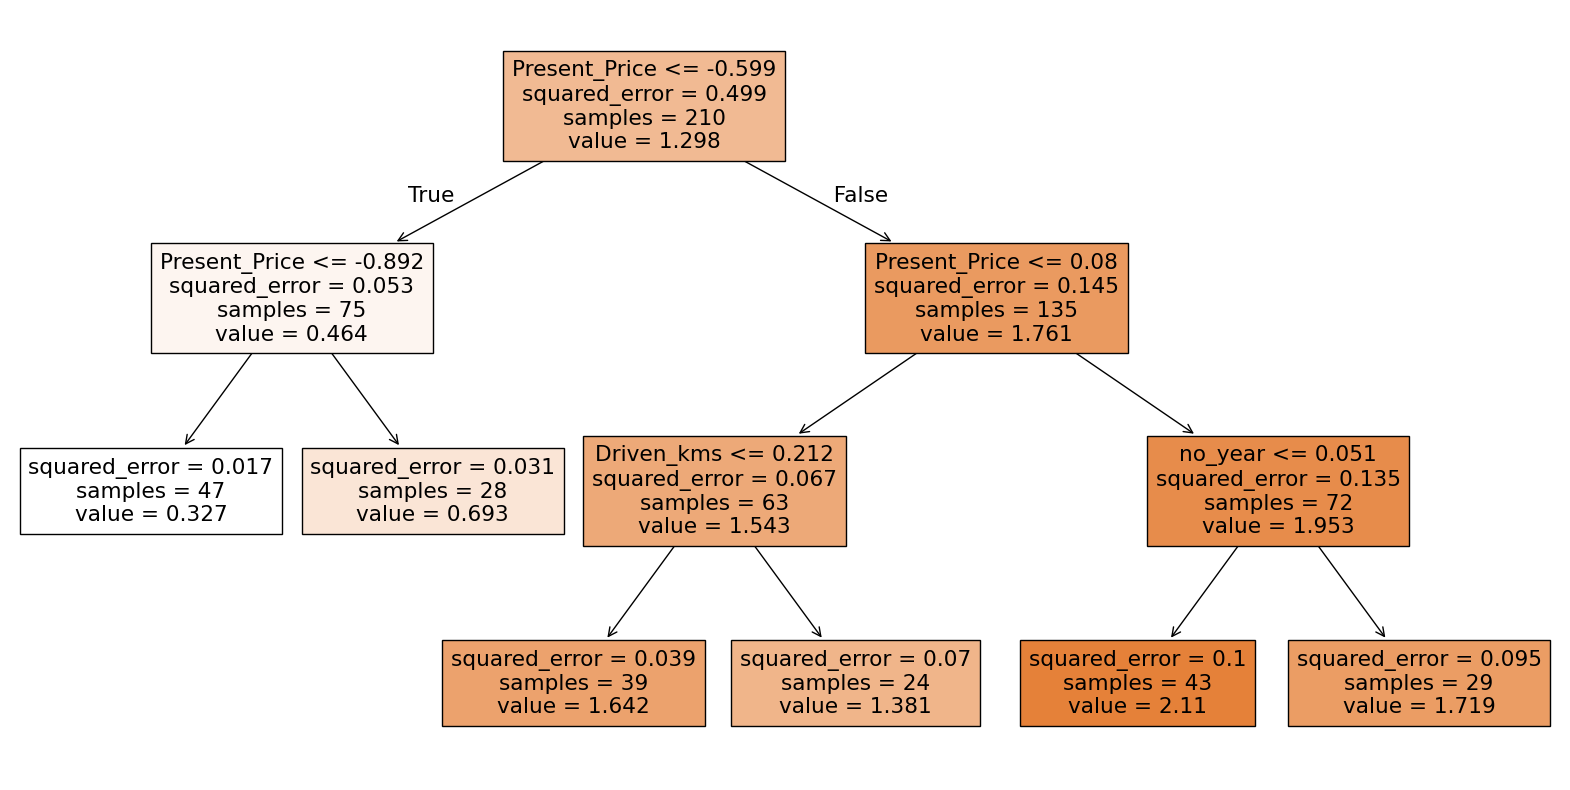

In [180]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=features, filled=True)
plt.show()



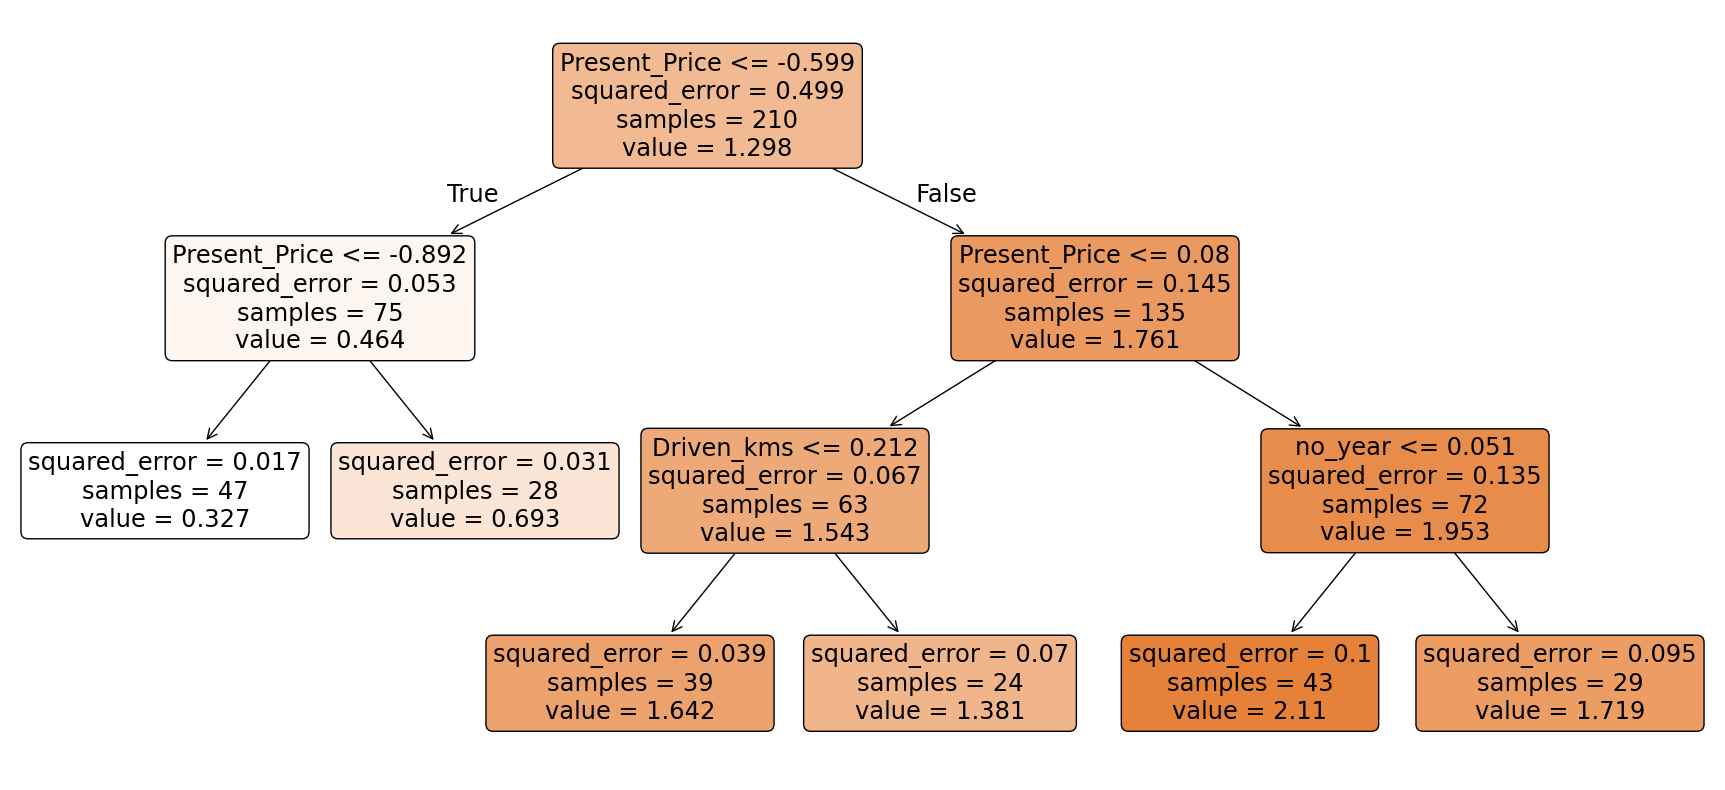

In [184]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 10))
plot_tree(
    dt_model,
    feature_names=features,
    filled=True,
    rounded=True
)
plt.show()


In [186]:
# Evaluation
result = evaluate_model(dt_model, y_test, y_pred_dt)
score['Decision tree tuned'] = result

MSE : 2.4342263298438334
RMSE : 1.560200733830052
MAE : 1.0801267388624902
Train R2 : 0.7600297006358052
Test R2 : 0.7037089102551515
Adjusted R2 :  0.6624531888982739


In [187]:
# Updated Evaluation Metric Score Chart
score
     

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.708352,2.434226
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.841636,1.560201
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.571648,1.080127
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.913780,0.703709
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.901775,0.662453


From the above tuned Decision tree regression, it has seen that earlier we have faced overfitting condition. After tuning it there is no such condition and it looks like model performs with good accuracy around 76% on train and 70% on test data.

In [191]:

# Import Random Forest Regressor class
rf = RandomForestRegressor(random_state=0)

# Fit the Random Forest model to your training data
rf.fit(X_train,y_train)

# Predict on the model
y_pred_rf1 = rf.predict(X_test)

# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

MSE : 0.5686494969625685
RMSE : 0.7540885206410243
MAE : 0.4947583987177409
Train R2 : 0.9852823123413166
Test R2 : 0.9307846698261996
Adjusted R2 :  0.9211470922070628


In [192]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.708352,2.434226,0.568649
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.841636,1.560201,0.754089
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.571648,1.080127,0.494758
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.985282
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.913780,0.703709,0.930785
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.901775,0.662453,0.921147


Here i have seen that using random forest, regression accuracy of the train and test model increases 98% and 93% respectively, which seems to be a good model for prediction.

In [194]:
# Random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model
     

In [195]:
# Fitting a Random Forest model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

In [196]:
# Best parameters for random forests
rf_best_params
     

{'min_samples_leaf': 20, 'n_estimators': 300}

In [199]:
# Building Random Forest model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [201]:
# Fitting model
rf_model.fit(X_train,y_train)
     

RandomForestRegressor(min_samples_leaf=20, n_estimators=300, random_state=0)

In [202]:
# Predict on the model
y_pred_rf = rf_model.predict(X_test)
     

# Evaluation matrices for RandomForest
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result


MSE : 2.1598547137265687
RMSE : 1.4696444174447671
MAE : 1.010518309341
Train R2 : 0.7710484475746358
Test R2 : 0.7371050920882741
Adjusted R2 :  0.7004994719992996


In [203]:
# Updated Evaluation Metric Score chart
score
     

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest,Random forest tuned
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.708352,2.434226,0.568649,2.159855
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.841636,1.560201,0.754089,1.469644
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.571648,1.080127,0.494758,1.010518
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.985282,0.771048
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.913780,0.703709,0.930785,0.737105
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.901775,0.662453,0.921147,0.700499


After tuning the random forest model it has seen that there is drop in performance both in train and test score so i am not going to use this model.1


In [205]:
# Import Gradient Boosting Regressor class
gb = GradientBoostingRegressor(random_state=0)

# Fit the Gradient Boosting model to the training data
gb.fit(X_train,y_train)

# Predict on the model
y_pred_gb1 = gb.predict(X_test)

In [206]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

MSE : 0.7834226536964246
RMSE : 0.8851116617107836
MAE : 0.5454911452882067
Train R2 : 0.9878401898231808
Test R2 : 0.9046427405090938
Adjusted R2 :  0.8913651474154233


In [207]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.708352,2.434226,0.568649,2.159855,0.783423
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.841636,1.560201,0.754089,1.469644,0.885112
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.571648,1.080127,0.494758,1.010518,0.545491
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.985282,0.771048,0.987840
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.913780,0.703709,0.930785,0.737105,0.904643
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.901775,0.662453,0.921147,0.700499,0.891365


Using Gradient Boosting Regressor i have got accuracy around 98% and 90% on train and test data respectively, which is less than random forest, decision tree algorithm.

So, lets tune it.

In [209]:
# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[300],
             'min_samples_leaf':np.arange(20,24),
             'max_depth':np.arange(14,17)
             }
     

# Perform the randomized search
random_search = RandomizedSearchCV(gb_model, param_distributions=gb_params, cv=6, n_iter=20, scoring='neg_root_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

gb_best_params = random_search.best_params_

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
# Best parameters for Gradient Boosting Model
gb_best_params
     

In [ ]:
# Building Gradient Boosting Model with best parameters
gb_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     max_depth = gb_best_params['max_depth'],
                                     random_state=0)
     

# Fitting model
gb_model.fit(X_train,y_train)

In [ ]:
# Predict on the Model
y_pred_gb = gb_model.predict(X_test)
     

# Evaluation matrices for GradientBoosting
result = evaluate_model(gb_model, y_test,y_pred_gb)
score['Gradient Boosting Regressor Tuned'] = result

In [ ]:
# Updated Evaluation Metric Score chart
score

After using the Randomised search CV, it gave accuracy 96% on train data & 88% on test data which is comparatively less than the untuned model.

In [ ]:
# Import Extreme Gradient Boosting Regressor class
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')

# Fit the Extreme Gradient Boosting model to the training data
xgb_model.fit(X_train,y_train)

# Predict on the model
y_pred_xgb1 = xgb_model.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(xgb_model, y_test,y_pred_xgb1)
score['Extreme Gradient Boosting Regressor'] = result

In [ ]:
# Updated Evaluation Metric Score chart
score

Using Extreme Gradient Boosting Regressor i have got accuracy around 99% and 88% on train and test data respectively. It is overfitting the model's training accuracy is almost 100%.

So, lets tune it.

In [ ]:
# XG boost model
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
xgb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(20,22)}
     

# Perform the randomized search
xgb_search = RandomizedSearchCV(xgb_model,xgb_params,cv=6,scoring='neg_root_mean_squared_error',n_iter=100, n_jobs=-1)
xgb_search.fit(X_train,y_train)
xgb_best_params = xgb_search.best_params_

In [ ]:
# Best parameters for XG boost Model
xgb_best_params

In [ ]:

# Building a XG boost model with best parameters
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                             min_samples_leaf=xgb_best_params['min_samples_leaf'],
                             random_state=0)

In [ ]:

# Fitting model
xgb_model.fit(X_train,y_train)

In [ ]:
# Predict on the model
y_pred_xgb = xgb_model.predict(X_test)
     

# Evaluation matrices for XGBRegressor
result = evaluate_model(xgb_model, y_test,y_pred_xgb)
score['Extreme Gradient Boosting Regressor Tuned'] = result

In [ ]:
# Updated Evaluation Metric Score chart
score
     

After tuning the model i have got the same accuracy on train and test data. Both are overfitted model.

In [ ]:
# Plot R2 scores for each model
score.columns

In [ ]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(20,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()
     

On the basis of all the model i have decided to select R2 score Evaluation matrics which shows the accuracy of the model which is very good indicator to check the feasibility of the model.

 have ran a several models like linear regression, decision tree, random forest, gradient boosting, and xtreame gradient boosting but amongst them i have selected random forest model as i achieved 98% training accuracy and 93% testing accuracy. Some models were overfitted so i did not consider them.